In [27]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
#mpl.use('pdf')
import sys
sys.path.append("../")
import copy
from Plotting.generate_database import ResultsDatabaseGenerator
from common_packages.utilities import get_equivalent_classical_layer_size, get_num_parameters_per_quantum_layer
from Plotting.Plot import BasicPlot, MultiPlot
import pandas as pd
import seaborn as sns
colors =   ["#5dd448",
            "#bfa900",
            "#ec742f",
            "#e9496f",
            "#b04ca4",]
palette = sns.color_palette('pastel')
colors = palette.as_hex()

sns.set_style('ticks')

#colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677", "#882255", "#AA4499"]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 10
plt.rcParams["axes.linewidth"] = 0.5

import tensorflow as tf
tf.compat.v1.enable_eager_execution()

from quantum_kerr import Net
from data import generate_synthetic_dataset_easy


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
model = Net(quantum_preparation_layer=True, max_initial_weight=0.2109)
train_data, test_data = generate_synthetic_dataset_easy(num_datapoints=1000, n_features=8, n_classes=4)

x = train_data[0][0:2]
print(x.shape)
model(x)
print(model.quantum_layer.traces)

(2, 8)
[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.10180111, 0.10797748],
       [0.08847806, 0.11922966]], dtype=float32)>, <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2.7017422, 2.741292 ],
       [2.850384 , 3.04405  ]], dtype=float32)>, <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.11312284, 0.128525  ],
       [0.10802767, 0.14282288]], dtype=float32)>, <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2.8070416, 3.2319632],
       [2.9804385, 3.5254977]], dtype=float32)>, <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.8344561, 1.1555611],
       [1.6587042, 1.5357105]], dtype=float32)>]
tf.Tensor(
[[0.10180111 2.7017422  0.11312284 2.8070416  1.8344561  0.10797748
  2.741292   0.128525   3.2319632  1.1555611 ]
 [0.08847806 2.850384   0.10802767 2.9804385  1.6587042  0.11922966
  3.04405    0.14282288 3.5254977  1.5357105 ]], shape=(2, 10), dtype=float32)
ListWrapper([0.9994687438011169, 0.9984755516052246])


In [2]:
kerr_cutoff_path = './Experiment_cutoff_hybrid_with_trace_kerr2/'

def generate_database(ex_path):
    dbGen = ResultsDatabaseGenerator()
    dbGen.initialize_from_folder(ex_path)
    data = dbGen.data
    config = data[1]['config']
    config.pop('__doc__', None)
    #config.pop('iteration', None)
    df = pd.DataFrame(columns=config.keys())
    df['iteration'] = np.nan
    # df['epoch'] = np.nan
    # df['acc'] = np.nan
    # df['val_acc'] = np.nan
    # df['loss'] = np.nan
    # df['val_loss'] = np.nan
    # df['traces_average'] = np.nan
    # df['trace_sum'] = np.nan
    # df['traces_std'] = np.nan
    for key in data[1]['metrics'].keys():
        df[key] = np.nan
    #df['trace_sum'] = np.nan
    for i in data.keys():
        config = data[i]['config']
        config.pop('__doc__', None)
        try:
            config['iteration']
        except KeyError:
            config['iteration'] = 1
        if config['iteration'] != -1:
            metrics = data[i]['metrics']
            temp_dict = {}
            for key in metrics.keys():
                temp_dict[key] = metrics[key]
            for key in config.keys():
                temp_dict[key] = config[key]
            df.loc[i] = temp_dict
            # print(metrics.keys())
            # acc, epoch, loss, trace_sum, traces_average, traces_std, traces_sum, val_acc, val_loss = metrics.values()
            # if acc[-1] > 0.0:
            #     acc = np.array(acc)
            #     loss = np.array(loss)
            #     val_acc = np.array(val_acc)
            #     val_loss = np.array(val_loss)
            #     df.loc[i] = [*config.values(), epoch, acc, val_acc, loss, val_loss, traces_average, traces_sum, traces_std]
    return df

df = generate_database(kerr_cutoff_path)
#df.drop(columns=['trace_sum'], inplace=True)
display(df.head())
display(df.describe())

,iteration,quantum_preparation_layer,regularizer_string,scale_max,accuracy,epoch,loss,traces_average,traces_std,val_accuracy,val_loss
22,0,False,L1=0.1,3,"[0.25285714864730835, 0.28142857551574707, 0.2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.8449598550796509, 1.7558289766311646, 1.695...","[0.7836856720050176, 0.7439761620362599, 0.712...","[0.05012397388927611, 0.059293702580056534, 0....","[0.273333340883255, 0.2933333218097687, 0.3466...","[1.7878899574279785, 1.7116342782974243, 1.663..."
21,0,False,L1=0.1,9,"[0.2514285743236542, 0.2514285743236542, 0.259...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2.51942777633667, 2.506282091140747, 2.493015...","[0.02549339993360142, 0.026049652185911935, 0....","[0.006562174298253209, 0.008463542658664579, 0...","[0.25333333015441895, 0.25333333015441895, 0.2...","[2.5122876167297363, 2.499147653579712, 2.4857..."
5,0,True,L2=0.1,3,"[0.25, 0.25285714864730835, 0.3100000023841858...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.6196300983428955, 1.6048903465270996, 1.590...","[0.0003093644333312113, 0.0007659478746742631,...","[0.00028509326908314155, 0.00063150324013864, ...","[0.25333333015441895, 0.25333333015441895, 0.3...","[1.6115102767944336, 1.597077488899231, 1.5832..."
23,0,False,L1=0.1,6,"[0.11857143044471741, 0.18857142329216003, 0.2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2.1451821327209473, 2.1257224082946777, 2.108...","[0.2132505915264289, 0.20159135295947395, 0.20...","[0.04274044115753797, 0.04551994474434816, 0.0...","[0.13333334028720856, 0.21666666865348816, 0.2...","[2.134812593460083, 2.116823673248291, 2.09935..."
15,0,True,L2=0.01,3,"[0.25, 0.25285714864730835, 0.3100000023841858...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.409700870513916, 1.4081379175186157, 1.4065...","[0.00030936528988725816, 0.0007660101428967513...","[0.0002850944788051398, 0.0006315612562825863,...","[0.25333333015441895, 0.25333333015441895, 0.3...","[1.4087682962417603, 1.4072073698043823, 1.405..."


,iteration,scale_max
count,24.0,24.000000
mean,0.0,4.750000
std,0.0,3.096281
min,0.0,1.000000
25%,0.0,2.500000
50%,0.0,4.500000
75%,0.0,6.750000
max,0.0,9.000000


,iteration,quantum_preparation_layer,regularizer_string,scale_max,accuracy,epoch,loss,traces_average,traces_std,val_accuracy,val_loss
0,0,False,L1=0.1,3,0.252857,0,1.844960,0.783686,0.050124,0.273333,1.787890
1,0,False,L1=0.1,3,0.281429,1,1.755829,0.743976,0.059294,0.293333,1.711634
2,0,False,L1=0.1,3,0.290000,2,1.695829,0.712271,0.073061,0.346667,1.663160
3,0,False,L1=0.1,3,0.420000,3,1.654737,0.700275,0.082909,0.470000,1.622717
4,0,False,L1=0.1,3,0.484286,4,1.614205,0.719135,0.086879,0.563333,1.582644


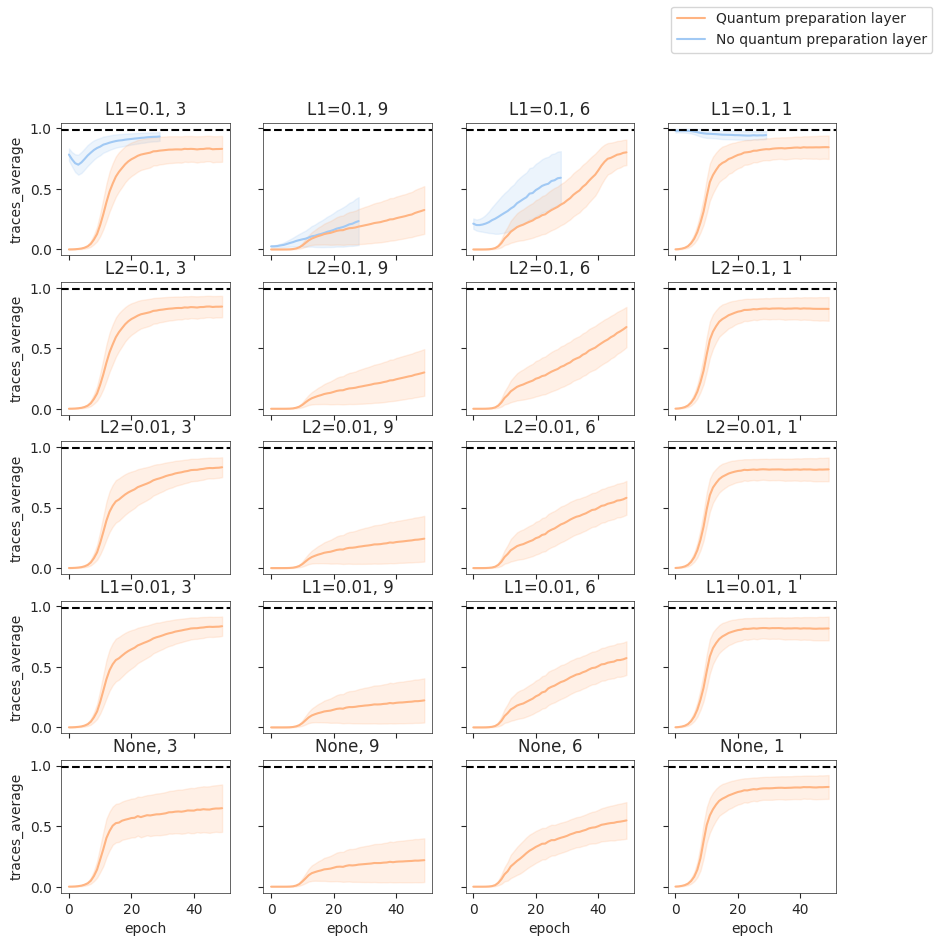

In [6]:
reg_strings = df['regularizer_string'].unique()
scale_max = df['scale_max'].unique()
quantum_preperation = df['quantum_preparation_layer'].unique()

fig, axs = plt.subplots(len(reg_strings),len(scale_max), figsize=(10,10), sharex=True, sharey=True)
axs_dict = dict(zip(reg_strings, axs))
axs_dict = {k: dict(zip(scale_max, v)) for k, v in axs_dict.items()}

cols = ['accuracy', 'val_accuracy', 'loss', 'val_loss', 'traces_average', 'traces_std', 'epoch']

df_exp = df.explode(column=cols)
df_exp[cols] = df_exp[cols].apply(pd.to_numeric, errors='coerce')
df_exp.reset_index(inplace=True)
df_exp.pop('index')
display(df_exp.head())

color_dict = dict(zip(quantum_preperation, colors))

for k1, v1 in axs_dict.items():
    for k2, v2 in v1.items():
        df_temp = df_exp[(df_exp['regularizer_string'] == k1) & (df_exp['scale_max'] == k2)]
        sns.lineplot(x='epoch', y='traces_average', hue='quantum_preparation_layer', data=df_temp, ax=v2, legend=False, hue_order=quantum_preperation)
        for qp in quantum_preperation:
            df_temp_qp = df_temp[df_temp['quantum_preparation_layer'] == qp]
            v2.fill_between(df_temp_qp['epoch'].values, 
                            df_temp_qp['traces_average'].values - df_temp_qp['traces_std'].values, 
                            df_temp_qp['traces_average'].values + df_temp_qp['traces_std'].values, color=color_dict[qp],
                            alpha=0.2)
        v2.axhline(y=0.99, color='k', linestyle='--')
        v2.set_title(f'{k1}, {k2}')

plt.plot([], [], color=color_dict[True], label='Quantum preparation layer')
plt.plot([], [], color=color_dict[False], label='No quantum preparation layer')
fig.legend()

plt.show()